# <p style="text-align: center;">A Timed Python Test</p>
## <p style="text-align: center;">Making The Case Against For Thinking Slow</p>
#### <p style="text-align: center;">Edmund Walsh -- Aug. 27th, 2020</p>

A recent fashion within the data science job market is to filter through candidates using timed coding challenges. In this analysis, I would like use one example of this trend, in an attempt to make an argument that when it comes to data science, in line with the insights of Daniel Kahneman, thinking slow is better than thinking fast.

In this example, the test sets out tasks for the candidate to perform, within the time limit. In short load, get to know, and examine the data, answer some questions on the data, and then run a model. While these are certainly important and valuable skills, this analysis will argue that the ability to do these set tasks in a time limit are not the best metrics for evaluation with three simple points:
1. Data cleaning and ETL pipelines are important skills, but it should be a rare task since if they are built well they won't need the re-application of the same code syntax.
2. A better metric for a data science is strategic thinking, for example, how to approach a problem that is not yet well formed, what models to use and why.
3. Finally, and perhaps most importantly is interpretation.
    
The structure of this analysis will be to go through this analysis, slowly, achieve the tasks set out but show how thinking about the problem slowly, and in particular with the focus as above allows for better insights.

### Data
The data for this analysis comes from the UCI Machine Learning Repository and can be found here: https://archive.ics.uci.edu/ml/datasets/Air+quality. The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded. 

In [1]:
# download data
import wget
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'
filename = wget.download(url)

100% [..........................................................................] 1543989 / 1543989

After downloading, unzip the file in the directory

In [2]:
import numpy as np
import pandas as pd
import statistics
import datetime
import math

In [3]:
## load data and a quick lookover
airqual = pd.read_csv('./AirQualityUCI/AirQualityUCI.csv', sep=";", thousands=",", parse_dates=["Date","Time"])
airqual.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-10-03,18.00.00,26.0,1360.0,150.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0,NaN,NaN
1,2004-10-03,19.00.00,2.0,1292.0,112.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0,NaN,NaN
2,2004-10-03,20.00.00,22.0,1402.0,88.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0,NaN,NaN
3,2004-10-03,21.00.00,22.0,1376.0,80.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0,NaN,NaN
4,2004-10-03,22.00.00,16.0,1272.0,51.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0,NaN,NaN


In [4]:
airqual.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-36.996687,1048.990061,-159.090093,18.656834,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,168.190232,465.260981,9846.342524,NaN,NaN
std,211.793927,329.832710,139.789093,413.802064,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,114.081191,216.407635,4447.196714,NaN,NaN
min,-2000.000000,-200.000000,-200.000000,-2000.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,4.000000,921.000000,-200.000000,40.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,109.000000,341.000000,6923.000000,NaN,NaN
50%,14.000000,1053.000000,-200.000000,79.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,172.000000,486.000000,9768.000000,NaN,NaN
75%,25.000000,1221.000000,-200.000000,136.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,241.000000,619.000000,12962.000000,NaN,NaN
max,119.000000,2040.000000,1189.000000,637.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,446.000000,887.000000,22310.000000,NaN,NaN


In [44]:
# As we can see this is very noisy data with some suspicious outliers
# We should apply a robust scaler for this analysis -- more discussion below
from sklearn import preprocessing

### Data Insights
The next section of the test looks for a few data points within our air quality data set.
1. What what the average CO level during the month of May in 2004
2. What is the most common day and time for the highest CO
3. Which month had the lowest average humidity
4. What are the correlations of the different variables to CO

In [6]:
%%capture
may_df = airqual[airqual['Date'] > '2004-04-30']
may_df = may_df[airqual['Date'] < '2004-06-1']
may_co_mean = statistics.mean(may_df['CO(GT)'])

In [7]:
"The Average CO Level During May 2004 was {:.2f}".format(may_co_mean)

'The Average CO Level During May 2004 was -31.67'

In [8]:
top_co = airqual.sort_values(["CO(GT)"], ascending=False).iloc[:10,]
avg_toptime = statistics.mean(list(map(lambda x: int(x[:2]),top_co['Time'])))
avg_day = statistics.mean(list(map(lambda x: x.weekday(), list(top_co['Date']))))
"The highest CO levels are at the going into Wednesday, about halfway between Tuesday and Wednesday, at just after 6:30pm"

'The highest CO levels are at the going into Wednesday, about halfway between Tuesday and Wednesday, at just after 6:30pm'

In [9]:
mth = list(map(lambda x: x.month, list(airqual['Date'])))
airqual['Month'] = mth
ah_df = airqual[["AH","Month"]].dropna()

In [10]:
mean_avg_ah = ah_df.groupby('Month').mean()
mean_avg_ah[mean_avg_ah["AH"] == min(mean_avg_ah["AH"])]
"The lowest humidity is in December"

'The lowest humidity is in December'

In [11]:
df_corr = airqual.corr()
df_co_corr = df_corr['CO(GT)'][1:]
df_co_corr.sort_values(ascending=False)

NO2(GT)          0.278905
NOx(GT)          0.264291
PT08.S5(O3)      0.117769
PT08.S2(NMHC)    0.109069
NMHC(GT)         0.082723
Month            0.075663
PT08.S1(CO)      0.072755
PT08.S4(NO2)     0.070430
T                0.022497
AH               0.002620
C6H6(GT)        -0.007046
RH              -0.053690
PT08.S3(NOx)    -0.132442
Unnamed: 15           NaN
Unnamed: 16           NaN
Name: CO(GT), dtype: float64

### Building A Simple Model
In this section, we will lag the CO variable by one hour as instructed to the test, we will benchmark this model vs. a simple AR1 model

In [12]:
airqual['target'] = airqual['CO(GT)'].shift(1)
airqual.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16,Month,target
0,2004-10-03,18.00.00,26.0,1360.0,150.0,119.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,136.0,489.0,7578.0,NaN,NaN,10.0,NaN
1,2004-10-03,19.00.00,2.0,1292.0,112.0,94.0,955.0,103.0,1174.0,92.0,1559.0,972.0,133.0,477.0,7255.0,NaN,NaN,10.0,26.0
2,2004-10-03,20.00.00,22.0,1402.0,88.0,90.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,119.0,540.0,7502.0,NaN,NaN,10.0,2.0
3,2004-10-03,21.00.00,22.0,1376.0,80.0,92.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,110.0,600.0,7867.0,NaN,NaN,10.0,22.0
4,2004-10-03,22.00.00,16.0,1272.0,51.0,65.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,112.0,596.0,7888.0,NaN,NaN,10.0,22.0


In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
tmp = df_co_corr.sort_values(ascending=False)
# based on our analysis before, use the variables of interest
voi = list(pd.DataFrame(tmp).index.values[[0,1,2,3,4,6,7,8,9,10,11]])

In [105]:
%%capture
lmdata = airqual[voi]
lmdata['CO(GT)'] = airqual['CO(GT)']
lmdata['target'] = airqual['target']

In [106]:
lmdata.head()
voi.append('CO(GT)')
#voi.append('Date')
#voi.append('Time')
voi

['NO2(GT)',
 'NOx(GT)',
 'PT08.S5(O3)',
 'PT08.S2(NMHC)',
 'NMHC(GT)',
 'PT08.S1(CO)',
 'PT08.S4(NO2)',
 'T',
 'AH',
 'C6H6(GT)',
 'RH',
 'CO(GT)',
 'CO(GT)',
 'CO(GT)']

In [107]:
lmdata = lmdata.dropna()
#lmdata.to_csv('./lmdata.csv')
#lmdata = pd.read_csv('./lmtest2.csv')
#dat = lmdata.loc[:,voi]
#dat.head()
#dat = preprocessing.RobustScaler(np.asarray(dat))
lmdata.replace(to_replace=-200,value=None,inplace=True)
lmdata.replace(to_replace=-2000,value=None,inplace=True)
lmdata.fillna(method='bfill',inplace=True)
lmdata.describe()

,NO2(GT),NOx(GT),PT08.S5(O3),PT08.S2(NMHC),NMHC(GT),PT08.S1(CO),PT08.S4(NO2),T,AH,C6H6(GT),RH,CO(GT),CO(GT),target
count,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000
mean,109.414493,240.739205,1030.486533,942.537195,270.509619,1102.702864,1452.988991,183.178602,10174.092988,101.902095,488.174220,19.508337,19.508337,19.508764
std,47.224171,206.628051,410.931384,269.593654,73.300184,219.583725,347.443866,88.222197,4048.415994,75.661549,173.552533,15.017625,15.017625,15.017753
min,2.000000,2.000000,221.000000,383.000000,7.000000,647.000000,551.000000,-19.000000,1847.000000,1.000000,92.000000,1.000000,1.000000,1.000000
25%,73.000000,97.000000,726.000000,733.000000,275.000000,938.000000,1227.750000,119.000000,7262.000000,44.000000,354.000000,8.000000,8.000000,8.000000
50%,102.000000,174.000000,964.000000,911.000000,275.000000,1062.000000,1460.000000,176.000000,9875.000000,83.000000,489.000000,16.000000,16.000000,16.000000
75%,137.000000,318.000000,1287.000000,1117.000000,275.000000,1237.000000,1677.000000,243.000000,13068.500000,140.000000,619.000000,26.000000,26.000000,26.000000
max,340.000000,1479.000000,2523.000000,2214.000000,1189.000000,2040.000000,2775.000000,446.000000,22310.000000,637.000000,887.000000,119.000000,119.000000,119.000000


In [108]:
X_train, X_test, y_train, y_test = train_test_split(lmdata[voi],lmdata['target'], test_size=0.4, random_state=0)

In [109]:
pdata = y_test
lm = linear_model.LinearRegression()
mod = lm.fit(X_train, y_train)
preds = mod.predict(X_test)
{
    'Mean-abs-error': metrics.mean_absolute_error(y_test, preds),
    'RMSE': math.sqrt(metrics.mean_squared_error(y_test, preds)),
    'R2': metrics.r2_score(y_test, preds)
}

{'Mean-abs-error': 6.187018757748815,
 'RMSE': 9.333848294131586,
 'R2': 0.5970991380093147}

In [110]:
# create the benchmark AR1
ardata = lmdata.loc[:,['CO(GT)','target']]
ardata['icept'] = [1 for i in range(len(lmdata))]
ardata.head()

,CO(GT),CO(GT),target,icept
1,2.0,2.0,26.0,1
2,22.0,22.0,2.0,1
3,22.0,22.0,22.0,1
4,16.0,16.0,22.0,1
5,12.0,12.0,16.0,1


In [111]:
X_train, X_test, y_train, y_test = train_test_split(ardata[['icept','CO(GT)']],ardata['target'], test_size=0.4, random_state=0)
ar = linear_model.LinearRegression()
ar_mod = ar.fit(X_train, y_train)
ar_preds = ar_mod.predict(X_test)
{
    'Mean-abs-error': metrics.mean_absolute_error(y_test, ar_preds),
    'RMSE': math.sqrt(metrics.mean_squared_error(y_test, ar_preds)),
    'R2': metrics.r2_score(y_test, ar_preds)
}

{'Mean-abs-error': 6.323116508966903,
 'RMSE': 9.856653820050168,
 'R2': 0.5507007141271991}

In [112]:
import matplotlib.pyplot as plt

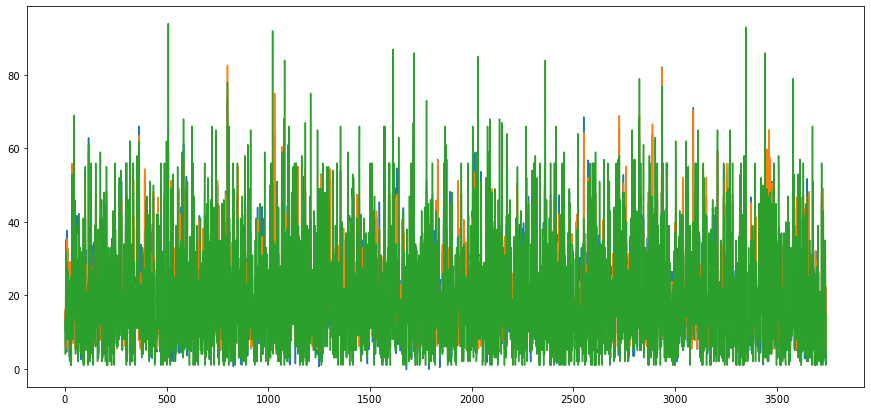

In [113]:
plt.figure(figsize=[15,7])
plt.plot(preds, label='full model')
plt.plot(ar_preds, label='AR1 model')
plt.plot(np.array(y_test), label='actual')

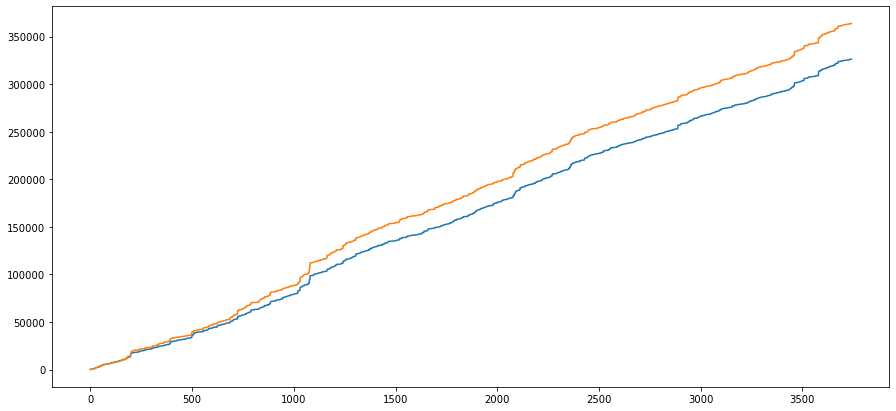

In [114]:
plt.figure(figsize=[15,7])
plt.plot(np.array(pd.Series((y_test-preds)**2).cumsum()),label="full model")
plt.plot(np.array(pd.Series((y_test-ar_preds)**2).cumsum()),label="AR1 model")

### Improvements
As stated, working on levels here could be problematic for time-series modelling. To showcase this, let's look at first differences

In [39]:
fddata = lmdata.diff().iloc[1:,]
fddata.head()

,Unnamed: 0,NO2(GT),NOx(GT),PT08.S5(O3),PT08.S2(NMHC),NMHC(GT),PT08.S1(CO),PT08.S4(NO2),T,AH,C6H6(GT),RH,CO(GT),target
1,1.0,22.0,28.0,102.0,-16.0,-24.0,110.0,-4.0,-14.0,247.0,-4.0,63.0,20.0,-24.0
2,1.0,8.0,41.0,129.0,9.0,-8.0,-26.0,29.0,-9.0,365.0,2.0,60.0,0.0,20.0
3,1.0,-6.0,-41.0,-93.0,-112.0,-29.0,-104.0,-94.0,2.0,21.0,-27.0,-4.0,-6.0,0.0
4,1.0,-20.0,-42.0,-161.0,-86.0,-13.0,-75.0,-97.0,0.0,-40.0,-18.0,-4.0,-4.0,-6.0
5,1.0,-19.0,-27.0,-216.0,-60.0,-7.0,-12.0,-60.0,1.0,-245.0,-11.0,-24.0,0.0,-4.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(fddata[voi],fddata['target'], test_size=0.4, random_state=0)
lm1 = linear_model.LinearRegression()
mod1 = lm1.fit(X_train, y_train)
preds1 = mod1.predict(X_test)
{
    'Mean-abs-error': metrics.mean_absolute_error(y_test, preds1),
    'RMSE': math.sqrt(metrics.mean_squared_error(y_test, preds1)),
    'R2': metrics.r2_score(y_test, preds1)
}

{'Mean-abs-error': 33.08964037929129,
 'RMSE': 152.80398440204465,
 'R2': 0.11633368375443198}

In [27]:
# create the benchmark AR1
fdardata = fddata.loc[:,['CO(GT)','target']]
fdardata['icept'] = [1 for i in range(len(fdardata))]
fdardata.head()

,CO(GT),target,icept
2,20.0,-24.0,1
3,0.0,20.0,1
4,-6.0,0.0,1
5,-4.0,-6.0,1
6,0.0,-4.0,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(fdardata[['icept','CO(GT)']],fdardata['target'], test_size=0.4, random_state=0)
fdar = linear_model.LinearRegression()
fdar_mod = fdar.fit(X_train, y_train)
fdar_preds = fdar_mod.predict(X_test)
{
    'Mean-abs-error': metrics.mean_absolute_error(y_test, fdar_preds),
    'RMSE': math.sqrt(metrics.mean_squared_error(y_test, fdar_preds)),
    'R2': metrics.r2_score(y_test, fdar_preds)
}

{'Mean-abs-error': 28.34285035313058,
 'RMSE': 153.8407459625883,
 'R2': 0.10430180807505307}

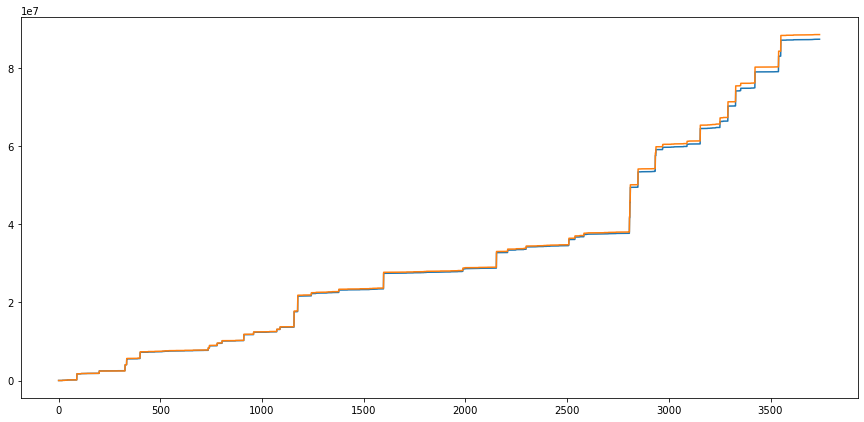

In [29]:
plt.figure(figsize=[15,7])
plt.plot(np.array(pd.Series((y_test-preds1)**2).cumsum()),label="full FD model")
plt.plot(np.array(pd.Series((y_test-fdar_preds)**2).cumsum()),label="AR1 FD model")

In [30]:
out_df = pd.DataFrame()
out_df['actual level'] = pdata
out_df['level model'] = preds
out_df['ar level model'] = ar_preds
#out_fd = np.array(list(preds1).insert(0,0))
#out_fdar = np.array(list(fdar_preds).insert(0,0))
#out_df['actual differences'] = np.insert(y_test,0,0)
out_df['differences model'] = np.insert(preds1,0,0)
out_df['ar differences model'] = np.insert(fdar_preds,0,0)
out_df.to_csv("./out.csv")
#np.insert(preds1,0,0)